In [33]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
def make_rect(a, b, f): #взято из лекции, будет также использоваться для создания прямоугольника из интервала [a; b] для х 
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    return (-f(xm) * rect[1], rect) 

In [190]:

def get_max_elem(lst):
    newlst = list(lst)
    elem=heapq.heappop(newlst)
    return elem, newlst


    
def adapt_rect_list(f, a, b, npts):

    lst = []

    item = make_rect(a, b, f)
    lst.append(item)
    
    for _ in range(npts):
        rect, lst = get_max_elem(lst)
        w, (start, width) = rect
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        heapq.heappush(lst, rect1)
        heapq.heappush(lst, rect2)
        #lst.append(rect1)
        #lst.append(rect2)
        
    return -sum(w for w, r in lst), lst

In [191]:
def f(x):
    return np.exp(-x)
a, b = 0, 20

for n in (5, 25, 125, 250, 500, 1000, 5000):
    res, lst = adapt_rect_list(f, a, b, n)
    print ('n, res = ', n, res)

n, res =  5 0.955269838834778
n, res =  25 0.978671896242808
n, res =  125 0.9956502001607697
n, res =  250 0.9959491604791236
n, res =  500 0.9960027891786782
n, res =  1000 0.9997391610745805
n, res =  5000 0.9999405212446223


In [192]:
%timeit adapt_rect_list(f, a, b, npts=1000)

19.4 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%timeit crect(f, a, b, npts=1000)

2.87 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [67]:
def crect(f, a, b, npts): #взят из лекции метод средних прямоугольников без адаптивной сетки для сравнения результатов 
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*(j + 0.5)
        summ += f(x)
    return summ * h

In [188]:
adapts=[]
withoutadapt=[]
x=list(range(30, 200))
for n in x:
    res, lst = adapt_rect_list(f, a, b, n)
    adapts.append(res)
    res2=crect(f, a, b, n)
    withoutadapt.append(res2)

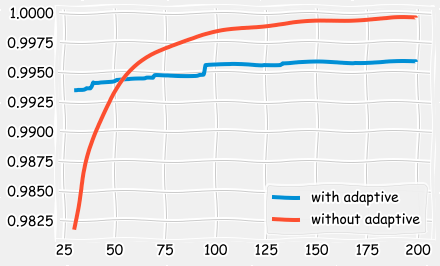

In [189]:
plt.plot( x, adapts, "-", label='with adaptive' )
plt.plot(x,withoutadapt, "-", label='without adaptive' )
plt.legend(loc='best')

Алгоритм с адаптивной сеткой требует больше времени (это может быть объяснимо тем, что на каждой итерации нужно находить максимальный элеемент) 